In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://data.seattle.gov/resource/87w5-fd6d.csv'
local = 'Seattle_Pet_Licenses.csv'

raw_pets = pd.read_csv(local)
raw_pets['License Issue Date'] = pd.to_datetime(raw_pets['License Issue Date'])
#raw_pets['License Number'] = pd.to_numeric(raw_pets['License Number']) #alpha-numeric id
#raw_pets['ZIP Code'] = pd.to_numeric(raw_pets['ZIP Code']) #need to examine null values


In [4]:
print(raw_pets.info())
raw_pets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66042 entries, 0 to 66041
Data columns (total 7 columns):
License Issue Date    66042 non-null datetime64[ns]
License Number        66042 non-null object
Animal's Name         64685 non-null object
Species               66042 non-null object
Primary Breed         66042 non-null object
Secondary Breed       22538 non-null object
ZIP Code              65884 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 3.5+ MB
None


,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
0,2005-03-29,130651,Ozzy,Dog,"Dachshund, Standard Smooth Haired",NaN,98104
1,2009-12-23,898148,Jack,Dog,"Schnauzer, Miniature","Terrier, Rat",98107
2,2006-01-20,29654,Ginger,Dog,"Retriever, Golden","Retriever, Labrador",98117
3,2006-02-07,75432,Pepper,Cat,Manx,Mix,98103
4,2006-08-04,729899,Addy,Dog,"Retriever, Golden",NaN,98105


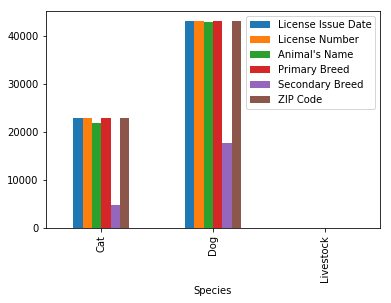

In [5]:
raw_pets.groupby('Species').count().plot(kind="bar")

In [ ]:
name_counts = (pd.DataFrame(raw_pets['Animal\'s Name'].value_counts())
                       .reset_index())
#name_counts.columns = ['Name', 'Count']

In [ ]:
name_counts